In [89]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [91]:
train_df = pd.read_csv("train.csv",index_col = 0)

In [93]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [95]:
train_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [97]:
X_train = train_df.drop('loan_status',axis = 1)
y_train = train_df[['loan_status']]

In [99]:
#X_train,X_test, y_train,y_test = train_test_split(X, y, random_state = 24, test_size = 0.3, stratify = y)

GaussianNB

In [102]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ct_ohe = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')

scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()
gb = GaussianNB()
pipe = Pipeline([('CT',ct_ohe),('SCL',None),('GB',gb)])
pipe.fit(X_train,y_train)

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D772001EE0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D77003E690>)],
                                   verbose_feature_names_out=False)),
                ('SCL', None), ('GB', GaussianNB())])

In [104]:
pipe.get_params()

{'memory': None,
 'steps': [('CT',
   ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002D772001EE0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002D77003E690>)],
                     verbose_feature_names_out=False)),
  ('SCL', None),
  ('GB', GaussianNB())],
 'verbose': False,
 'CT': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D772001EE0>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
           

In [106]:
##################

kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
params = {'GB__var_smoothing':np.linspace(1e-15,1,10),
          'SCL':[scaler_mm,scaler_std,None]
         }

gcv = GridSearchCV(pipe,param_grid = params,scoring = 'roc_auc',
                   cv = kfold, verbose = 3)



In [108]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END GB__var_smoothing=1e-15, SCL=MinMaxScaler();, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=1e-15, SCL=MinMaxScaler();, score=0.874 total time=   0.1s
[CV 3/5] END GB__var_smoothing=1e-15, SCL=MinMaxScaler();, score=0.874 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=1e-15, SCL=MinMaxScaler();, score=0.873 total time=   0.1s
[CV 5/5] END GB__var_smoothing=1e-15, SCL=MinMaxScaler();, score=0.874 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=1e-15, SCL=StandardScaler();, score=0.873 total time=   0.1s
[CV 2/5] END GB__var_smoothing=1e-15, SCL=StandardScaler();, score=0.874 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=1e-15, SCL=StandardScaler();, score=0.874 total time=   0.1s
[CV 4/5] END GB__var_smoothing=1e-15, SCL=StandardScaler();, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=1e-15, SCL=StandardScaler();, score=0.874 total time=   0.1s
[CV 1/5] END .GB__var_smoothing=1e-15, SCL=None;, score=0.873 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .GB__var_smoothing=1e-15, SCL=None;, score=0.874 total time=   0.0s
[CV 3/5] END .GB__var_smoothing=1e-15, SCL=None;, score=0.874 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .GB__var_smoothing=1e-15, SCL=None;, score=0.873 total time=   0.0s
[CV 5/5] END .GB__var_smoothing=1e-15, SCL=None;, score=0.874 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.111111111111112, SCL=MinMaxScaler();, score=0.849 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.111111111111112, SCL=MinMaxScaler();, score=0.846 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.111111111111112, SCL=MinMaxScaler();, score=0.842 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.111111111111112, SCL=MinMaxScaler();, score=0.852 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.111111111111112, SCL=MinMaxScaler();, score=0.846 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.111111111111112, SCL=StandardScaler();, score=0.875 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.111111111111112, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 3/5] END GB__var_smoothing=0.111111111111112, SCL=StandardScaler();, score=0.874 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.111111111111112, SCL=StandardScaler();, score=0.875 total time=   0.1s
[CV 5/5] END GB__var_smoothing=0.111111111111112, SCL=StandardScaler();, score=0.875 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.111111111111112, SCL=None;, score=0.709 total time=   0.0s
[CV 2/5] END GB__var_smoothing=0.111111111111112, SCL=None;, score=0.720 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.111111111111112, SCL=None;, score=0.737 total time=   0.0s
[CV 4/5] END GB__var_smoothing=0.111111111111112, SCL=None;, score=0.723 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.111111111111112, SCL=None;, score=0.722 total time=   0.0s
[CV 1/5] END GB__var_smoothing=0.222222222222223, SCL=MinMaxScaler();, score=0.843 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.222222222222223, SCL=MinMaxScaler();, score=0.839 total time=   0.1s
[CV 3/5] END GB__var_smoothing=0.222222222222223, SCL=MinMaxScaler();, score=0.834 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.222222222222223, SCL=MinMaxScaler();, score=0.844 total time=   0.1s
[CV 5/5] END GB__var_smoothing=0.222222222222223, SCL=MinMaxScaler();, score=0.839 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.222222222222223, SCL=StandardScaler();, score=0.875 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.222222222222223, SCL=StandardScaler();, score=0.877 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.222222222222223, SCL=StandardScaler();, score=0.874 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.222222222222223, SCL=StandardScaler();, score=0.875 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.222222222222223, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.222222222222223, SCL=None;, score=0.711 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.222222222222223, SCL=None;, score=0.718 total time=   0.0s
[CV 3/5] END GB__var_smoothing=0.222222222222223, SCL=None;, score=0.732 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.222222222222223, SCL=None;, score=0.719 total time=   0.0s
[CV 5/5] END GB__var_smoothing=0.222222222222223, SCL=None;, score=0.722 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.333333333333334, SCL=MinMaxScaler();, score=0.839 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.333333333333334, SCL=MinMaxScaler();, score=0.835 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.333333333333334, SCL=MinMaxScaler();, score=0.830 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.333333333333334, SCL=MinMaxScaler();, score=0.841 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.333333333333334, SCL=MinMaxScaler();, score=0.836 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.333333333333334, SCL=StandardScaler();, score=0.875 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.333333333333334, SCL=StandardScaler();, score=0.877 total time=   0.1s
[CV 3/5] END GB__var_smoothing=0.333333333333334, SCL=StandardScaler();, score=0.874 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.333333333333334, SCL=StandardScaler();, score=0.875 total time=   0.1s
[CV 5/5] END GB__var_smoothing=0.333333333333334, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.333333333333334, SCL=None;, score=0.711 total time=   0.0s
[CV 2/5] END GB__var_smoothing=0.333333333333334, SCL=None;, score=0.716 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.333333333333334, SCL=None;, score=0.729 total time=   0.0s
[CV 4/5] END GB__var_smoothing=0.333333333333334, SCL=None;, score=0.718 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.333333333333334, SCL=None;, score=0.722 total time=   0.0s
[CV 1/5] END GB__var_smoothing=0.444444444444445, SCL=MinMaxScaler();, score=0.837 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.444444444444445, SCL=MinMaxScaler();, score=0.832 total time=   0.1s
[CV 3/5] END GB__var_smoothing=0.444444444444445, SCL=MinMaxScaler();, score=0.827 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.444444444444445, SCL=MinMaxScaler();, score=0.838 total time=   0.1s
[CV 5/5] END GB__var_smoothing=0.444444444444445, SCL=MinMaxScaler();, score=0.834 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.444444444444445, SCL=StandardScaler();, score=0.875 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.444444444444445, SCL=StandardScaler();, score=0.877 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.444444444444445, SCL=StandardScaler();, score=0.874 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.444444444444445, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.444444444444445, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.444444444444445, SCL=None;, score=0.710 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.444444444444445, SCL=None;, score=0.714 total time=   0.0s
[CV 3/5] END GB__var_smoothing=0.444444444444445, SCL=None;, score=0.726 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.444444444444445, SCL=None;, score=0.716 total time=   0.0s
[CV 5/5] END GB__var_smoothing=0.444444444444445, SCL=None;, score=0.721 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.5555555555555559, SCL=MinMaxScaler();, score=0.835 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.5555555555555559, SCL=MinMaxScaler();, score=0.830 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.5555555555555559, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.5555555555555559, SCL=MinMaxScaler();, score=0.836 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.5555555555555559, SCL=MinMaxScaler();, score=0.832 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.5555555555555559, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.5555555555555559, SCL=StandardScaler();, score=0.877 total time=   0.1s
[CV 3/5] END GB__var_smoothing=0.5555555555555559, SCL=StandardScaler();, score=0.874 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.5555555555555559, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 5/5] END GB__var_smoothing=0.5555555555555559, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.5555555555555559, SCL=None;, score=0.708 total time=   0.0s
[CV 2/5] END GB__var_smoothing=0.5555555555555559, SCL=None;, score=0.712 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.5555555555555559, SCL=None;, score=0.723 total time=   0.0s
[CV 4/5] END GB__var_smoothing=0.5555555555555559, SCL=None;, score=0.715 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.5555555555555559, SCL=None;, score=0.719 total time=   0.0s
[CV 1/5] END GB__var_smoothing=0.666666666666667, SCL=MinMaxScaler();, score=0.833 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.666666666666667, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 3/5] END GB__var_smoothing=0.666666666666667, SCL=MinMaxScaler();, score=0.823 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.666666666666667, SCL=MinMaxScaler();, score=0.834 total time=   0.0s
[CV 5/5] END GB__var_smoothing=0.666666666666667, SCL=MinMaxScaler();, score=0.830 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.666666666666667, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.666666666666667, SCL=StandardScaler();, score=0.877 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.666666666666667, SCL=StandardScaler();, score=0.874 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.666666666666667, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.666666666666667, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.666666666666667, SCL=None;, score=0.706 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.666666666666667, SCL=None;, score=0.710 total time=   0.0s
[CV 3/5] END GB__var_smoothing=0.666666666666667, SCL=None;, score=0.719 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.666666666666667, SCL=None;, score=0.713 total time=   0.0s
[CV 5/5] END GB__var_smoothing=0.666666666666667, SCL=None;, score=0.717 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.777777777777778, SCL=MinMaxScaler();, score=0.831 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.777777777777778, SCL=MinMaxScaler();, score=0.826 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.777777777777778, SCL=MinMaxScaler();, score=0.822 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.777777777777778, SCL=MinMaxScaler();, score=0.832 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.777777777777778, SCL=MinMaxScaler();, score=0.829 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.777777777777778, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.777777777777778, SCL=StandardScaler();, score=0.877 total time=   0.1s
[CV 3/5] END GB__var_smoothing=0.777777777777778, SCL=StandardScaler();, score=0.874 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.777777777777778, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 5/5] END GB__var_smoothing=0.777777777777778, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.777777777777778, SCL=None;, score=0.704 total time=   0.0s
[CV 2/5] END GB__var_smoothing=0.777777777777778, SCL=None;, score=0.708 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.777777777777778, SCL=None;, score=0.717 total time=   0.0s
[CV 4/5] END GB__var_smoothing=0.777777777777778, SCL=None;, score=0.711 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.777777777777778, SCL=None;, score=0.715 total time=   0.0s
[CV 1/5] END GB__var_smoothing=0.888888888888889, SCL=MinMaxScaler();, score=0.830 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.888888888888889, SCL=MinMaxScaler();, score=0.824 total time=   0.0s
[CV 3/5] END GB__var_smoothing=0.888888888888889, SCL=MinMaxScaler();, score=0.821 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.888888888888889, SCL=MinMaxScaler();, score=0.831 total time=   0.1s
[CV 5/5] END GB__var_smoothing=0.888888888888889, SCL=MinMaxScaler();, score=0.828 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=0.888888888888889, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 2/5] END GB__var_smoothing=0.888888888888889, SCL=StandardScaler();, score=0.877 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=0.888888888888889, SCL=StandardScaler();, score=0.874 total time=   0.1s
[CV 4/5] END GB__var_smoothing=0.888888888888889, SCL=StandardScaler();, score=0.875 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=0.888888888888889, SCL=StandardScaler();, score=0.876 total time=   0.1s
[CV 1/5] END GB__var_smoothing=0.888888888888889, SCL=None;, score=0.702 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=0.888888888888889, SCL=None;, score=0.706 total time=   0.0s
[CV 3/5] END GB__var_smoothing=0.888888888888889, SCL=None;, score=0.715 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=0.888888888888889, SCL=None;, score=0.709 total time=   0.0s
[CV 5/5] END GB__var_smoothing=0.888888888888889, SCL=None;, score=0.713 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END GB__var_smoothing=1.0, SCL=MinMaxScaler();, score=0.829 total time=   0.1s
[CV 2/5] END GB__var_smoothing=1.0, SCL=MinMaxScaler();, score=0.823 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END GB__var_smoothing=1.0, SCL=MinMaxScaler();, score=0.820 total time=   0.1s
[CV 4/5] END GB__var_smoothing=1.0, SCL=MinMaxScaler();, score=0.830 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END GB__var_smoothing=1.0, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END GB__var_smoothing=1.0, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END GB__var_smoothing=1.0, SCL=StandardScaler();, score=0.877 total time=   0.1s
[CV 3/5] END GB__var_smoothing=1.0, SCL=StandardScaler();, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END GB__var_smoothing=1.0, SCL=StandardScaler();, score=0.875 total time=   0.1s
[CV 5/5] END GB__var_smoothing=1.0, SCL=StandardScaler();, score=0.876 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...GB__var_smoothing=1.0, SCL=None;, score=0.701 total time=   0.0s
[CV 2/5] END ...GB__var_smoothing=1.0, SCL=None;, score=0.704 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...GB__var_smoothing=1.0, SCL=None;, score=0.713 total time=   0.0s
[CV 4/5] END ...GB__var_smoothing=1.0, SCL=None;, score=0.708 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...GB__var_smoothing=1.0, SCL=None;, score=0.712 total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002D772001EE0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._colu...02D77003E690>)],
                                                          verbose_feature_names_out=False)),
                                       ('SCL', None), ('GB', GaussianNB())]),
             param_grid={'GB__var_smoothing': array([1.00000000e-15, 1.11111111e-01, 2.22222222e-01, 3.33333333e-01,
       4.44444444e-01, 5.55555556e-01, 6.66666667e-01, 7.77777778e-01,
       8.88888889e-01, 1.00000000e+00]),
                         'SCL': [MinMaxScaler(), StandardScaler(), None]},
             scoring='roc_auc', verbose=3)

In [110]:
print(gcv.best_params_)
print(gcv.best_score_)

{'GB__var_smoothing': 0.5555555555555559, 'SCL': StandardScaler()}
0.8757134939783422


In [112]:
X_test = pd.read_csv("test.csv",index_col = 0)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39098 entries, 58645 to 97742
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.6+ MB


In [114]:
bm_gb = gcv.best_estimator_
y_pred = bm_gb.predict(X_test)

In [116]:
y_pred.shape

(39098,)

In [118]:
X_test.shape

(39098, 11)

In [136]:
sample = pd.read_csv('sample_submission.csv')

In [137]:

sample['loan_status'] = y_pred
sample.to_csv('GB_6_nov_1.csv',index=False)

In [124]:
sample.shape


(39098, 2)

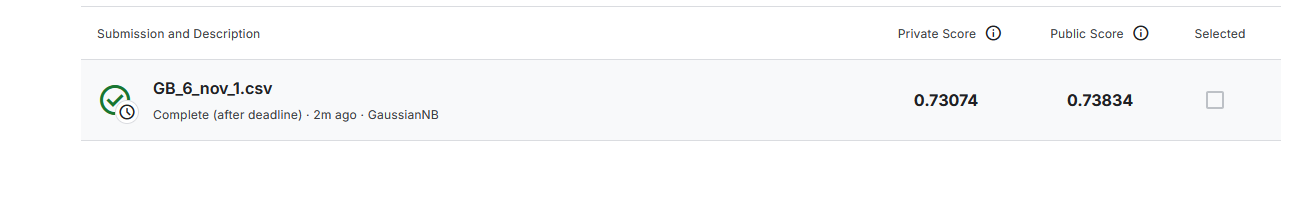

Logistic Regression


In [22]:
lr = LogisticRegression(random_state = 24)
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ct_ohe = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')

pipe = Pipeline([('CT',ct_ohe),('LR',lr)])


In [23]:
pipe.get_params()

{'memory': None,
 'steps': [('CT',
   ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002D766B36F30>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002D766B35850>)],
                     verbose_feature_names_out=False)),
  ('LR', LogisticRegression(random_state=24))],
 'verbose': False,
 'CT': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D766B36F30>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
     

In [24]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
# Define the hyperparameter grid

params = {'LR__solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
          'LR__penalty': ['l2','l1','elasticnet'],
         'LR__C': np.linspace(0.001,1,11)}
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, verbose = 3)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.001, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l2, LR__solver=lbfgs;, score=0.885 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.001, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.001, LR__penalty=l2, LR__solver=lbfgs;, score=0.883 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.001, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s
[CV 1/5] END LR__C=0.001, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.001, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.001, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.001, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 1/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cg;, score=0.895 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cg;, score=0.895 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 3/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cg;, score=0.896 total time=   3.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 4/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cg;, score=0.897 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cg;, score=0.895 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.895 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.895 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.896 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.897 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.895 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.001, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.001, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.001, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.001, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.001, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.001, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.001, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.3s
[CV 1/5] END LR__C=0.001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.001, LR__penalty=l1, LR__solver=liblinear;, score=0.882 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l1, LR__solver=liblinear;, score=0.886 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.001, LR__penalty=l1, LR__solver=liblinear;, score=0.883 total time=   0.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.001, LR__penalty=l1, LR__solver=liblinear;, score=0.884 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.001, LR__penalty=l1, LR__solver=liblinear;, score=0.883 total time=   0.2s
[CV 1/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__pena

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.001, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.001, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   2.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.001, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   2.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.001, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   2.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   2.8s
[CV 1/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] EN

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=lbfgs;, score=0.883 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 2/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=lbfgs;, score=0.884 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s
[CV 1/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cg;, score=0.907 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cg;, score=0.904 total time=   4.0s
[CV 4/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cg;, score=0.907 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.907 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.910 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.904 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.908 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.908 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.1009, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.3s
[CV 1/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   0.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   0.5s
[CV 1/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.100

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.1009, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   3.0s
[CV 1/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.1009, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=lbfgs;, score=0.884 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s
[CV 1/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s
[CV 3/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cg;, score=0.908 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 2/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cg;, score=0.911 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cg;, score=0.906 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.908 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.906 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.910 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.2008, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.4s
[CV 1/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   0.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   0.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=liblinear;, score=0.913 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   0.6s
[CV 1/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.200

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.2008, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   3.1s
[CV 1/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.2008, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=lbfgs;, score=0.885 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=lbfgs;, score=0.883 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s
[CV 1/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 2/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 3/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cg;, score=0.907 total time=   3.6s
[CV 4/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cg;, score=0.911 total time=   3.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 5/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cg;, score=0.911 total time=   3.7s
[CV 1/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.908 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.3007, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.4s
[CV 1/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   0.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=liblinear;, score=0.913 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   2.6s
[CV 1/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.300

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.3007, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   3.1s
[CV 1/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.3007, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=lbfgs;, score=0.885 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=lbfgs;, score=0.883 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s
[CV 1/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.8s
[CV 2/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cg;, score=0.913 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 3/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cg;, score=0.911 total time=   3.7s
[CV 5/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cg;, score=0.911 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.913 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.908 total time=   0.1s
[CV 4/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.4006, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.3s
[CV 1/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   0.9s
[CV 1/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.400

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.4006, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   2.9s
[CV 1/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.4006, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=lbfgs;, score=0.885 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s
[CV 1/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s
[CV 3/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cg;, score=0.913 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.7s
[CV 4/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 5/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cg;, score=0.911 total time=   3.8s
[CV 1/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.910 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.913 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5005, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.3s
[CV 1/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   1.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   0.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   0.8s
[CV 1/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.500

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5005, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   3.0s
[CV 1/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5005, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=lbfgs;, score=0.886 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=lbfgs;, score=0.883 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s
[CV 1/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s
[CV 3/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cg;, score=0.913 total time=   3.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 3/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.7s
[CV 1/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.910 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.913 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.6004, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.3s
[CV 1/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   0.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   0.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   1.0s
[CV 1/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.600

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.6004, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   3.0s
[CV 1/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.6004, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=lbfgs;, score=0.886 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=lbfgs;, score=0.884 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.5s
[CV 1/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s
[CV 3/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cg;, score=0.914 total time=   3.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 3/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.9s
[CV 1/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.910 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.913 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.2s
[CV 5/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.7003, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.2s
[CV 1/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   1.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   0.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   1.8s
[CV 1/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.700

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.7003, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   2.9s
[CV 1/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.7003, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=lbfgs;, score=0.885 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=lbfgs;, score=0.883 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.5s
[CV 1/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s
[CV 2/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cg;, score=0.914 total time=   3.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 3/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   2.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.7s
[CV 5/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.910 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.913 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.8002, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.3s
[CV 1/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   0.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   2.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   0.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   0.7s
[CV 1/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.800

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.8002, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   2.8s
[CV 1/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.8002, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=lbfgs;, score=0.884 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=lbfgs;, score=0.878 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=lbfgs;, score=0.883 total time=   0.4s
[CV 1/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s
[CV 2/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s
[CV 4/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 2/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cg;, score=0.913 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 5/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.5s
[CV 1/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.910 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.913 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s
[CV 4/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.9001, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.2s
[CV 1/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   1.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   0.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   1.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=liblinear;, score=0.914 total time=   0.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   0.9s
[CV 1/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.900

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.9001, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   2.8s
[CV 1/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.9001, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was ex

[CV 1/5] END LR__C=1.0, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l2, LR__solver=lbfgs;, score=0.885 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=1.0, LR__penalty=l2, LR__solver=lbfgs;, score=0.881 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=1.0, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=1.0, LR__penalty=l2, LR__solver=lbfgs;, score=0.882 total time=   0.4s
[CV 1/5] END LR__C=1.0, LR__penalty=l2, LR__solver=liblinear;, score=0.868 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.2s
[CV 3/5] END LR__C=1.0, LR__penalty=l2, LR__solver=liblinear;, score=0.872 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=1.0, LR__penalty=l2, LR__solver=liblinear;, score=0.873 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=1.0, LR__penalty=l2, LR__solver=liblinear;, score=0.871 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cg;, score=0.910 total time=   3.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cg;, score=0.913 total time=   3.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 3/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cg;, score=0.909 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV 4/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py

[CV 5/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cg;, score=0.912 total time=   3.4s
[CV 1/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.911 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.913 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.909 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=1.0, LR__penalty=l2, LR__solver=newton-cholesky;, score=0.912 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=1.0, LR__penalty=l2, LR__solver=sag;, score=0.868 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=1.0, LR__penalty=l2, LR__solver=sag;, score=0.872 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=1.0, LR__penalty=l2, LR__solver=sag;, score=0.873 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=1.0, LR__penalty=l2, LR__solver=sag;, score=0.871 total time=   1.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=1.0, LR__penalty=l2, LR__solver=saga;, score=0.868 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=1.0, LR__penalty=l2, LR__solver=saga;, score=0.872 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=1.0, LR__penalty=l2, LR__solver=saga;, score=0.873 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0, LR__penalty=l2, LR__solver=saga;, score=0.871 total time=   2.2s
[CV 1/5] END LR__C=1.0, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0, LR__penalty=l1, LR__solver=lbfgs;, score=nan total time=   0.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=1.0, LR__penalty=l1, LR__solver=liblinear;, score=0.911 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l1, LR__solver=liblinear;, score=0.915 total time=   1.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=1.0, LR__penalty=l1, LR__solver=liblinear;, score=0.910 total time=   2.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=1.0, LR__penalty=l1, LR__solver=liblinear;, score=0.913 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END LR__C=1.0, LR__penalty=l1, LR__solver=liblinear;, score=0.912 total time=   1.8s
[CV 1/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0, LR__penalty=l1, LR__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0, LR__penalty=l1, LR__solver=new

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END LR__C=1.0, LR__penalty=l1, LR__solver=saga;, score=0.868 total time=   2.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END LR__C=1.0, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END LR__C=1.0, LR__penalty=l1, LR__solver=saga;, score=0.872 total time=   3.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END LR__C=1.0, LR__penalty=l1, LR__solver=saga;, score=0.873 total time=   3.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0, LR__penalty=l1, LR__solver=saga;, score=0.871 total time=   2.8s
[CV 1/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0, LR__penalty=elasticnet, LR__solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0, LR__pen

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
550 fits failed out of a total of 990.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dai.STUDENTSDC\AppData\Local\an

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002D766B36F30>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._colu...umn_selector object at 0x000002D766B35850>)],
                                                          verbose_feature_names_out=False)),
                                       ('LR',
                                        LogisticRegression(random_state=24))]),
             param_grid={'LR__C': array([0.001 , 0.1009, 0.2008, 0.3007, 0.4006, 0.5005, 0.6004, 0.7003,
       0.8002, 0.9001, 1.    ]),
                         'LR__penalty': ['l2', 'l1', 'elasticnet'],
                         'LR__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']},
             verbose=3)

In [25]:
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 0.5005, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
0.9123710461249894


In [26]:
X_test = pd.read_csv("test.csv",index_col = 0)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39098 entries, 58645 to 97742
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.6+ MB


In [27]:
bm_lr = gcv.best_estimator_
y_pred = bm_lr.predict(X_test)
sample = pd.read_csv('sample_submission.csv')



In [28]:
bm_lr

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D76778C260>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D76778E600>)],
                                   verbose_feature_names_out=False)),
                ('LR',
                 LogisticRegression(C=0.5005, penalty='l1', random_state=24,
                                    solver='liblinear'))])

In [29]:
y_pred.shape

(39098,)

In [30]:
sample.shape

(39098, 2)

In [31]:
sample['loan_status'] = y_pred


In [32]:
sample.to_csv('LR_6_nov_1.csv',index=False)

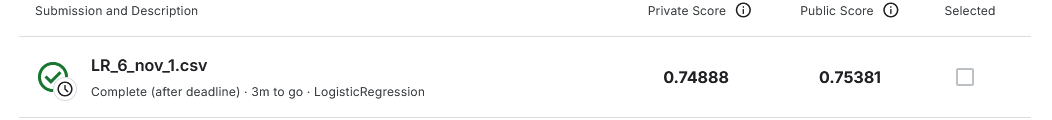


KNN


In [126]:
knc = KNeighborsClassifier()
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()
kfold = KFold(n_splits = 5, shuffle = True,random_state = 24)
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ct_ohe = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')
pipe = Pipeline([('CT',ct_ohe),('SCL',None),('KNC',knc)])
params = {'KNC__n_neighbors': np.arange(1, 10),
          'KNC__metric': ['cityblock'],
          
          'SCL':[scaler_std,scaler_mm,None],
          
          'KNC__algorithm': ['ball_tree']    
         }

#,'minkowski','euclidean','manhattan','haversine'
#'KNC__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 

gcv = GridSearchCV(pipe,param_grid = params,verbose = 3, cv = kfold) 
gcv.fit(X_train,y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=StandardScaler();, score=0.904 total time=  36.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=StandardScaler();, score=0.907 total time=  35.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=StandardScaler();, score=0.907 total time=  34.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=StandardScaler();, score=0.906 total time=  34.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=StandardScaler();, score=0.902 total time=  35.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=MinMaxScaler();, score=0.902 total time=  17.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=MinMaxScaler();, score=0.904 total time=  19.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=MinMaxScaler();, score=0.902 total time=  23.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=MinMaxScaler();, score=0.904 total time=  26.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=MinMaxScaler();, score=0.899 total time=  22.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=None;, score=0.873 total time=   1.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=None;, score=0.872 total time=   1.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=None;, score=0.875 total time=   1.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=None;, score=0.880 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=1, SCL=None;, score=0.879 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=StandardScaler();, score=0.926 total time=  36.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=StandardScaler();, score=0.924 total time=  35.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=StandardScaler();, score=0.924 total time=  34.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=StandardScaler();, score=0.928 total time=  35.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=StandardScaler();, score=0.922 total time=  36.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=MinMaxScaler();, score=0.922 total time=  17.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=MinMaxScaler();, score=0.921 total time=  19.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=MinMaxScaler();, score=0.922 total time=  24.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=MinMaxScaler();, score=0.924 total time=  26.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=MinMaxScaler();, score=0.916 total time=  25.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=None;, score=0.889 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=None;, score=0.889 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=None;, score=0.892 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=None;, score=0.892 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=2, SCL=None;, score=0.890 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=StandardScaler();, score=0.931 total time=  39.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=StandardScaler();, score=0.931 total time=  36.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=StandardScaler();, score=0.932 total time=  39.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=StandardScaler();, score=0.932 total time=  35.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=StandardScaler();, score=0.928 total time=  36.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=MinMaxScaler();, score=0.929 total time=  19.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=MinMaxScaler();, score=0.930 total time=  19.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=MinMaxScaler();, score=0.926 total time=  24.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=MinMaxScaler();, score=0.931 total time=  30.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=MinMaxScaler();, score=0.924 total time=  25.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=None;, score=0.892 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=None;, score=0.893 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=None;, score=0.896 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=None;, score=0.893 total time=   1.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=3, SCL=None;, score=0.895 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=StandardScaler();, score=0.933 total time=  36.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=StandardScaler();, score=0.932 total time=  35.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=StandardScaler();, score=0.933 total time=  32.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=StandardScaler();, score=0.935 total time=  32.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=StandardScaler();, score=0.930 total time=  31.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=MinMaxScaler();, score=0.930 total time=  16.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=MinMaxScaler();, score=0.931 total time=  16.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=MinMaxScaler();, score=0.928 total time=  19.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=MinMaxScaler();, score=0.931 total time=  23.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=MinMaxScaler();, score=0.926 total time=  21.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=None;, score=0.893 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=None;, score=0.897 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=None;, score=0.896 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=None;, score=0.895 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=4, SCL=None;, score=0.896 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=StandardScaler();, score=0.935 total time=  32.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=StandardScaler();, score=0.937 total time=  33.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=StandardScaler();, score=0.936 total time=  33.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=StandardScaler();, score=0.937 total time=  33.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=StandardScaler();, score=0.932 total time=  30.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=MinMaxScaler();, score=0.932 total time=  17.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=MinMaxScaler();, score=0.935 total time=  17.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=MinMaxScaler();, score=0.931 total time=  22.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=MinMaxScaler();, score=0.935 total time=  25.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=MinMaxScaler();, score=0.930 total time=  22.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=None;, score=0.894 total time=   1.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=None;, score=0.895 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=None;, score=0.895 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=None;, score=0.897 total time=   1.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=5, SCL=None;, score=0.897 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=StandardScaler();, score=0.935 total time=  32.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=StandardScaler();, score=0.934 total time=  38.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=StandardScaler();, score=0.936 total time=  34.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=StandardScaler();, score=0.937 total time=  38.3s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=StandardScaler();, score=0.933 total time=  35.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=MinMaxScaler();, score=0.932 total time=  19.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=MinMaxScaler();, score=0.934 total time=  19.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=MinMaxScaler();, score=0.931 total time=  24.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=MinMaxScaler();, score=0.933 total time=  28.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=MinMaxScaler();, score=0.928 total time=  23.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=None;, score=0.897 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=None;, score=0.896 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=None;, score=0.897 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=None;, score=0.898 total time=   2.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=6, SCL=None;, score=0.900 total time=   1.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=StandardScaler();, score=0.937 total time=  38.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=StandardScaler();, score=0.938 total time=  38.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=StandardScaler();, score=0.936 total time=  37.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=StandardScaler();, score=0.939 total time=  38.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=StandardScaler();, score=0.935 total time=  35.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=MinMaxScaler();, score=0.934 total time=  18.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=MinMaxScaler();, score=0.937 total time=  19.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=MinMaxScaler();, score=0.933 total time=  23.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=MinMaxScaler();, score=0.937 total time=  27.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=MinMaxScaler();, score=0.933 total time=  23.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=None;, score=0.896 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=None;, score=0.896 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=None;, score=0.897 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=None;, score=0.899 total time=   1.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=7, SCL=None;, score=0.899 total time=   1.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=StandardScaler();, score=0.936 total time=  35.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=StandardScaler();, score=0.935 total time=  35.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=StandardScaler();, score=0.935 total time=  33.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=StandardScaler();, score=0.939 total time=  35.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=StandardScaler();, score=0.935 total time=  35.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=MinMaxScaler();, score=0.935 total time=  18.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=MinMaxScaler();, score=0.936 total time=  20.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=MinMaxScaler();, score=0.933 total time=  22.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=MinMaxScaler();, score=0.935 total time=  27.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=MinMaxScaler();, score=0.930 total time=  24.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=None;, score=0.895 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=None;, score=0.897 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=None;, score=0.897 total time=   1.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=None;, score=0.899 total time=   1.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=8, SCL=None;, score=0.899 total time=   1.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=StandardScaler();, score=0.939 total time=  35.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=StandardScaler();, score=0.936 total time=  35.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=StandardScaler();, score=0.938 total time=  33.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=StandardScaler();, score=0.941 total time=  33.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=StandardScaler();, score=0.936 total time=  35.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=MinMaxScaler();, score=0.936 total time=  18.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=MinMaxScaler();, score=0.938 total time=  19.0s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=MinMaxScaler();, score=0.934 total time=  22.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=MinMaxScaler();, score=0.937 total time=  26.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=MinMaxScaler();, score=0.932 total time=  24.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=None;, score=0.894 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=None;, score=0.896 total time=   1.7s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 3/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=None;, score=0.896 total time=   1.8s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 4/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=None;, score=0.899 total time=   1.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 5/5] END KNC__algorithm=ball_tree, KNC__metric=cityblock, KNC__n_neighbors=9, SCL=None;, score=0.899 total time=   1.9s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002D770648800>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002D770695190>)],
                                                          verbose_feature_names_out=False)),
                                       ('SCL', None),
                                       ('KNC', KNeighborsClassifier())]),
             param_grid={'KNC__algorithm': ['ball_tree'],
                         'KNC__metric': ['cityblock'],
                         'KNC__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'SCL': [StandardScaler(), MinMaxScaler(), None]},
             verbose=3)

In [129]:
pipe.get_params()

{'memory': None,
 'steps': [('CT',
   ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002D770648800>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002D770695190>)],
                     verbose_feature_names_out=False)),
  ('SCL', None),
  ('KNC', KNeighborsClassifier())],
 'verbose': False,
 'CT': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D770648800>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',


In [131]:
print(gcv.best_params_)
print(gcv.best_score_)

{'KNC__algorithm': 'ball_tree', 'KNC__metric': 'cityblock', 'KNC__n_neighbors': 9, 'SCL': StandardScaler()}
0.9378463637138715


In [138]:
X_test = pd.read_csv("test.csv",index_col = 0)
bm_knc = gcv.best_estimator_
y_pred = bm_knc.predict(X_test)
sample = pd.read_csv('sample_submission.csv')
sample['loan_status'] = y_pred

sample.to_csv('KNC_6_nov_1.csv',index=False)

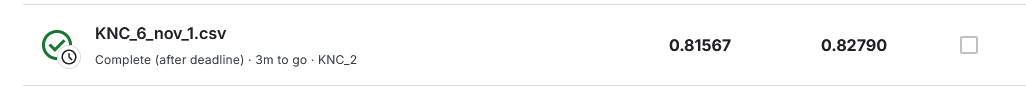